<a href="https://colab.research.google.com/github/ghoshal7/python_basics/blob/master/Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
pd.options.display.max_columns = None

In [111]:
downloaded = drive.CreateFile({'id':'1tBMjrZehHiOcQurOdwTxCepmByFWwFtQ'}) 
downloaded.GetContentFile('auto.csv')
df = pd.read_csv('auto.csv')
print('size = ', df.shape)
df.head()

size =  (392, 10)


Unnamed: 0   mpg  cylinders  displacement  horsepower  weight  \
0           1  18.0          8         307.0         130    3504   
1           2  15.0          8         350.0         165    3693   
2           3  18.0          8         318.0         150    3436   
3           4  16.0          8         304.0         150    3433   
4           5  17.0          8         302.0         140    3449   

   acceleration  year  origin                       name  
0          12.0    70       1  chevrolet chevelle malibu  
1          11.5    70       1          buick skylark 320  
2          11.0    70       1         plymouth satellite  
3          12.0    70       1              amc rebel sst  
4          10.5    70       1                ford torino

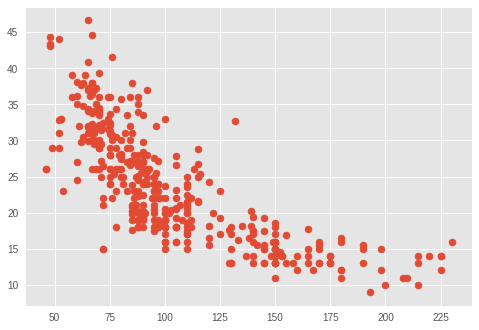

In [112]:
plt.scatter(df.horsepower, df.mpg)

# Simple Linear Regression

In [0]:
# prepare data
y = df.iloc[:,1].values

X = df.iloc[:,4].values
X = X.reshape(-1, 1)

In [0]:
# fit model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [0]:
print("Intercept:", lr.intercept_)

Intercept: 40.606097600118346


In [0]:
print("Co-efficient:",lr.coef_)

Co-efficient: [-0.16259724]


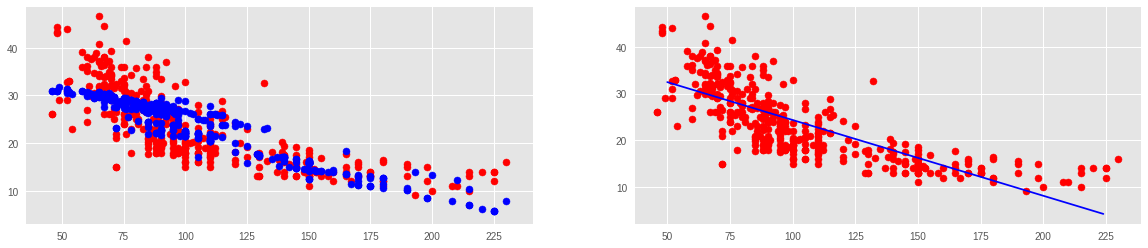

In [0]:
f, a = plt.subplots(1,2, figsize = (20,4))

a[0].scatter(X, y, color = 'red')
a[0].scatter(X, y_hat, color = 'blue')

a[1].scatter(X, y, color = 'red')
# get the line
x_plot = np.arange(50,225)
y_plot = [lr.intercept_ + i*lr.coef_ for i in x_plot]
a[1].plot(x_plot,y_plot, color = 'blue')

# Multiple Linear Regression

In [0]:
X = df[['horsepower', 'displacement']].values

In [0]:
# fit model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [0]:
print("Intercept:", lr.intercept_)

Intercept: 37.46948766803039


In [0]:
print("Co-efficient:",lr.coef_)

Co-efficient: [-0.05827533 -0.04081837]


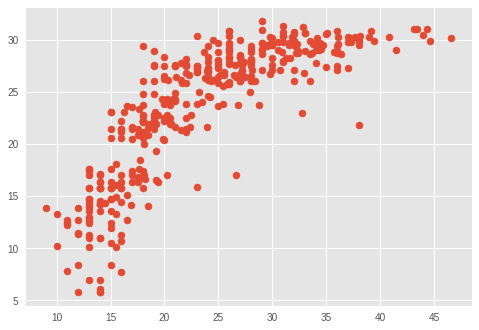

In [0]:
y_hat = lr.predict(X)

plt.scatter(y,y_hat)

# Train - Test

In [0]:
# split train - test
from sklearn.model_selection  import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [0]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [0]:
y_hat = lr.predict(X_test)

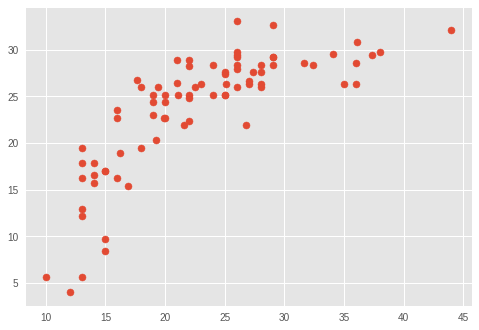

In [0]:
plt.scatter(y_test, y_hat)

# Metrics

In [0]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, y_hat)

22.153237123863413

In [0]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_hat)

3.782512710126959

In [0]:
from sklearn.metrics import r2_score

r2_score(y_test, y_hat)

0.5659681822256185

# Power of Python of R

In [0]:
texts = df.name

In [0]:
text_words = texts.str.split()

# print(text_words)

In [0]:
all_words = [i for i in text_words]

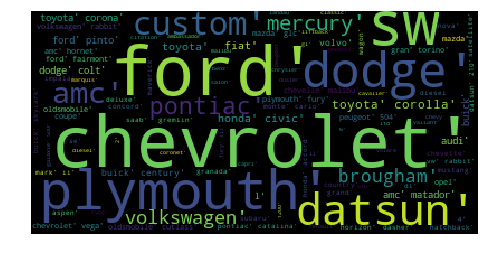

In [0]:
from collections import Counter
from wordcloud import WordCloud

word_counter = Counter(str(all_words))

wc = WordCloud(background_color = 'black', max_words = 1000)
wc.generate(str(all_words))
plt.imshow(wc)
plt.axis("off")
plt.show()

# Default Dataset

In [135]:
downloaded = drive.CreateFile({'id':'1n6mp53KWc_3CjoN6R844eDvXZqUqxdRD'}) 
downloaded.GetContentFile('default.csv')
df = pd.read_csv('default.csv')
print('size = ', df.shape)
df.head()

size =  (10000, 5)


Unnamed: 0 default student      balance        income
0           1      No      No   729.526495  44361.625074
1           2      No     Yes   817.180407  12106.134700
2           3      No      No  1073.549164  31767.138947
3           4      No      No   529.250605  35704.493935
4           5      No      No   785.655883  38463.495879

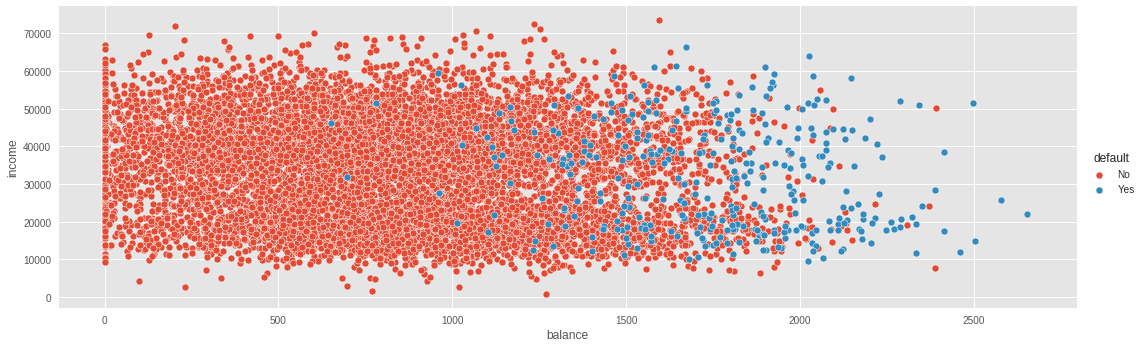

In [136]:
sb.pairplot(x_vars=["balance"], y_vars=["income"], data=df, hue="default", size=5, aspect = 3)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


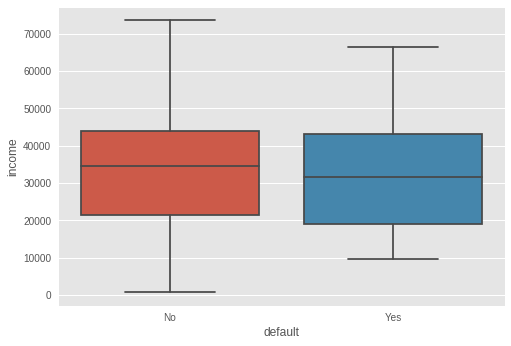

In [137]:
sb.boxplot(x = df.default, y = df.income, data = df)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


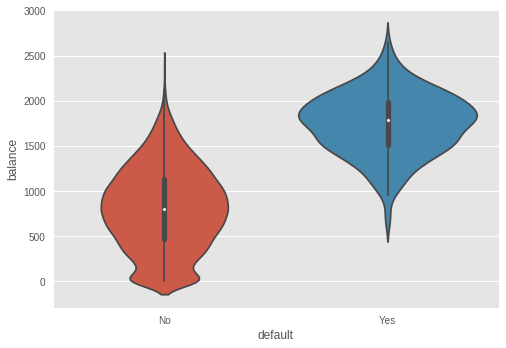

In [138]:
sb.violinplot(x = df.default, y = df.balance, data = df)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


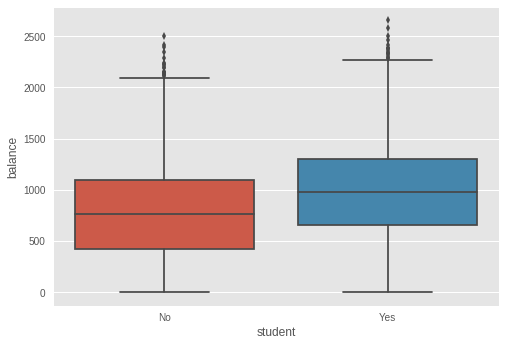

In [139]:
sb.boxplot(x = df.student, y = df.balance, data = df)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


Text(0.5, 1.0, 'Non students')

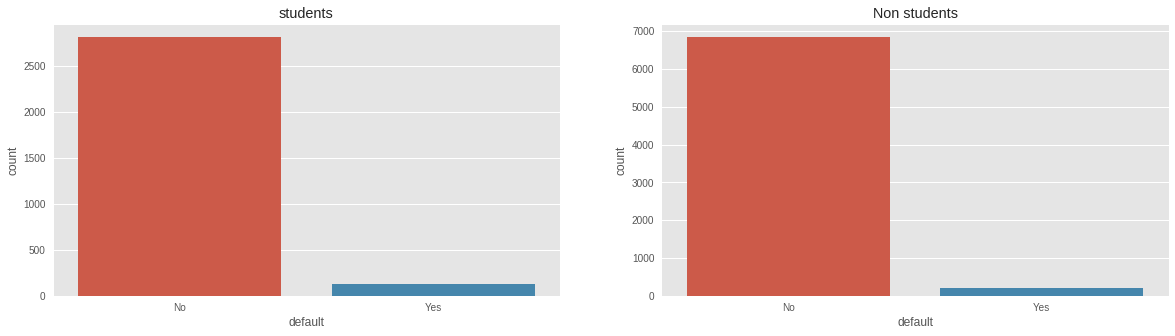

In [143]:
f, a = plt.subplots(1,2,figsize = (20,5))
sb.countplot(df[df.student == 'Yes'].default, ax = a[0]); a[0].set_title('students')
sb.countplot(df[df.student == 'No'].default, ax = a[1]); a[1].set_title('Non students')

In [146]:
pd.get_dummies(df).head()

Unnamed: 0      balance        income  default_No  default_Yes  student_No  \
0           1   729.526495  44361.625074           1            0           1   
1           2   817.180407  12106.134700           1            0           0   
2           3  1073.549164  31767.138947           1            0           1   
3           4   529.250605  35704.493935           1            0           1   
4           5   785.655883  38463.495879           1            0           1   

   student_Yes  
0            0  
1            1  
2            0  
3            0  
4            0

In [147]:
df.loc[df.default == 'No', 'target'] = 0
df.loc[df.default == 'Yes', 'target'] = 1

df.head()

Unnamed: 0 default student      balance        income  target
0           1      No      No   729.526495  44361.625074     0.0
1           2      No     Yes   817.180407  12106.134700     0.0
2           3      No      No  1073.549164  31767.138947     0.0
3           4      No      No   529.250605  35704.493935     0.0
4           5      No      No   785.655883  38463.495879     0.0

In [148]:
df.loc[df.student == 'No', 'student_num'] = 0
df.loc[df.student == 'Yes', 'student_num'] = 1

df.head()

Unnamed: 0 default student      balance        income  target  student_num
0           1      No      No   729.526495  44361.625074     0.0          0.0
1           2      No     Yes   817.180407  12106.134700     0.0          1.0
2           3      No      No  1073.549164  31767.138947     0.0          0.0
3           4      No      No   529.250605  35704.493935     0.0          0.0
4           5      No      No   785.655883  38463.495879     0.0          0.0

# Logistic regression

In [0]:
from sklearn.linear_model import LogisticRegression

logistic_reg = LogisticRegression()

In [0]:
y = df.target.values
X = df[['balance', 'income', 'student_num']]

In [0]:
# split train - test
from sklearn.model_selection  import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [160]:
logistic_reg.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [161]:
logistic_reg.intercept_

array([-1.8038716e-06])

In [162]:
logistic_reg.coef_

array([[ 4.43912646e-04, -1.28389031e-04, -2.29274128e-06]])

In [163]:
logistic_reg.score(X_test, y_test)

0.9655

In [164]:
logistic_reg.score(X_train, y_train)

0.966375

In [0]:
y_hat = logistic_reg.predict(X_test)